<a href="https://colab.research.google.com/github/gbaresis/National-Health-and-Nutrition-Health-Survey-2013-2014-NHANES-Age-Prediction/blob/main/National_Health_and_Nutrition_Health_Survey_2013_2014_(NHANES)_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset import

**I will analyze the [National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset](https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset).**

**To begin with, we need to load the corresponding dataset following the instructions on the webpage.**

In [75]:
pip install ucimlrepo

In [76]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
df = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.original

Note: We use the ".original" aatribute to load all the avalaible variables of the table to our dataframe.

In [77]:
#I use the first column (SEQN) as index
df['SEQN'] = df['SEQN'].astype(int)
df = df.set_index('SEQN')

#then print the dataframe to check how it looks like
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,,,,,,,,,
73564,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
73568,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
73576,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
73577,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
73580,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [78]:
#store only the features as a new dataframe
X = df.drop(columns=['age_group', 'RIDAGEYR']) #features

# 2.Dataset description & basic EDA

In [79]:
entries = X.shape[0]
features = X.shape[1]
print(f'Our dataset has {entries} entries and {features} features.')

Our dataset has 2278 entries and 7 features.


In [80]:
#As we can see in the National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset webpage
#none of the attributes has missing values, but we can check it ourselves as well:
missing_values = X.isnull().sum().sum()
print(f'We have {missing_values} missing values in total.')

We have 0 missing values in total.


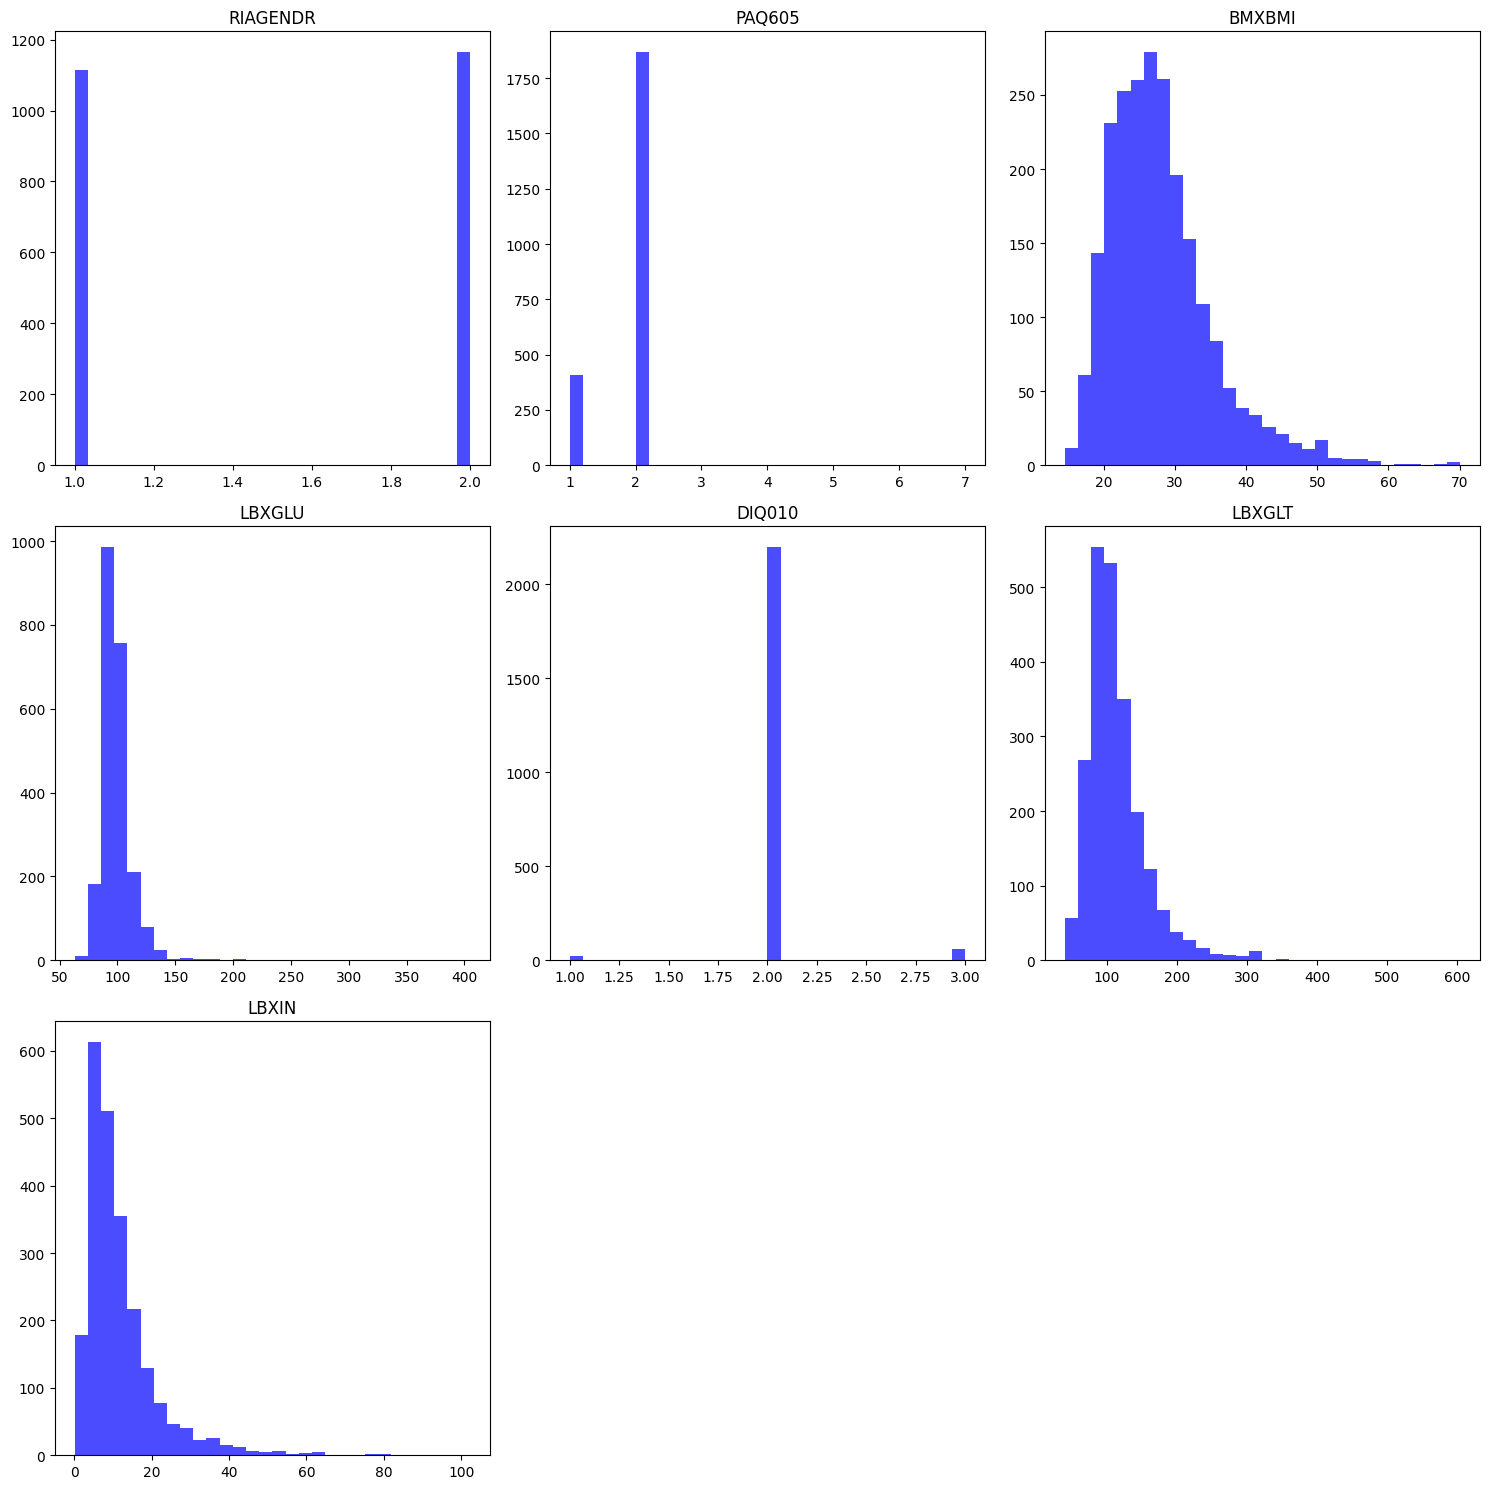

In [81]:
#create histograms to check features' distribution

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    axes[i].hist(X[column], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'{column}')

axes[i+1].axis('off')
axes[i+2].axis('off')



plt.tight_layout()
plt.show()

According to NHANES website:

*PAQ605: a 1 represents that the respondent takes part in weekly moderate or vigorous-intensity physical activity and a 2 represents that they do not*

However, looking at the histograms some entries seem to have different entries, so we need to check it.

In [90]:
X.loc[(X["PAQ605"] != 1) & (X["PAQ605"] != 2)]

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,,,,,,,
75487,1.0,7.0,21.1,110.0,2.0,66.0,4.24


In one entry we have the value 7 for PAQ605 which is not acceptable according to feature's definition, so we need to remove it.

In [94]:
X = X.drop(index = 75487)
X.shape

(2277, 7)

Also, for feature DIQ010, the description is the following:

*If the Respondent is diabetic*

So, one could expect for this feature to be binary, but as we can see in the histogram it is not. This time we will remove any values, because 1,2,3 could indicate how serious is the condition of a patient.